<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/Ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,  roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import  roc_auc_score

from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# загрузим датасет
data= pd.read_csv('data.csv', header=None)

print(data.head())

                     0                    1                    2  \
0  process.b1.capacity  process.b2.capacity  process.b3.capacity   
1                    0                    0                    2   
2                    0                    0                    2   
3                    0                    0                    2   
4                    0                    0                    2   

                     3               4                 5                6  \
0  process.b4.capacity  property.price  property.product  property.winner   
1                    1              59                 1                0   
2                    1              59                 2                0   
3                    1              59                 4                0   
4                    1              59                 6                0   

                     7                   8  
0  verification.result   verification.time  
1                False  163.3166666666

In [ ]:
#оформим таблицу
# Зададим первую строку как заголовки
data.columns = data.iloc[0]

#  Удаляем первую строку
data = data.drop(0).reset_index(drop=True)

# Изменим нумерацию строк, чтобы они начинались с 1
data.index = data.index + 1


print(data.head())


0 process.b1.capacity process.b2.capacity process.b3.capacity  \
1                   0                   0                   2   
2                   0                   0                   2   
3                   0                   0                   2   
4                   0                   0                   2   
5                   0                   0                   2   

0 process.b4.capacity property.price property.product property.winner  \
1                   1             59                1               0   
2                   1             59                2               0   
3                   1             59                4               0   
4                   1             59                6               0   
5                   1             60                1               0   

0 verification.result   verification.time  
1               False  163.31666666666666  
2               False              200.86  
3               False  154.88888888888

In [ ]:
# Преобразуем в числовые данные
data['verification.time'] = pd.to_numeric(data['verification.time'], errors='coerce')  # преобразуем время в числовой тип
data['verification.result'] = data['verification.result'].map({'True': True, 'False': False})
data['verification.result'] = data['verification.result'].astype(int) # преобразуем результат в числовой тип (1/0)

convert = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
                   'property.price', 'property.product', 'property.winner']
data[convert] = data[convert].apply(pd.to_numeric, errors='coerce')


print(data.dtypes)


0
process.b1.capacity      int64
process.b2.capacity      int64
process.b3.capacity      int64
process.b4.capacity      int64
property.price           int64
property.product         int64
property.winner          int64
verification.result      int32
verification.time      float64
dtype: object


In [ ]:
# Проверка наличия пропущенных значений в каждом столбце
print(data.isnull().sum())


0
process.b1.capacity    0
process.b2.capacity    0
process.b3.capacity    0
process.b4.capacity    0
property.price         0
property.product       0
property.winner        0
verification.result    0
verification.time      0
dtype: int64


In [ ]:
# таким образом в данных нет пропусков и нулей, у нас 2043 строки

In [ ]:
# Выведем количество уникальных значений для каждого столбца
print(data.nunique())

# Выведем уникальные значения каждого столбца
for col in data.columns:
    unique_values = data[col].unique()
    print(f'Уникальные значения в столбце {col}: {unique_values}')


0
process.b1.capacity       3
process.b2.capacity       4
process.b3.capacity       2
process.b4.capacity       2
property.price           32
property.product          6
property.winner           5
verification.result       2
verification.time      2039
dtype: int64
Уникальные значения в столбце process.b1.capacity: [0 1 2]
Уникальные значения в столбце process.b2.capacity: [0 1 2 3]
Уникальные значения в столбце process.b3.capacity: [2 1]
Уникальные значения в столбце process.b4.capacity: [1 0]
Уникальные значения в столбце property.price: [59 60 69 70 61 62 63 64 65 66 67 68 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90]
Уникальные значения в столбце property.product: [1 2 4 6 3 5]
Уникальные значения в столбце property.winner: [0 3 4 2 1]
Уникальные значения в столбце verification.result: [0 1]
Уникальные значения в столбце verification.time: [ 163.31666667  200.86        154.88888889 ... 9365.45       8474.025
   82.00833333]


In [ ]:
# мы видим, что большинство столбцов содержат категориальные фичи:
#в столбце process.b1.capacity: [0 1 2],
#в столбце process.b2.capacity: [0 1 2 3]
#в столбце process.b3.capacity: [2 1]
#в столбце process.b4.capacity: [1 0]
#в столбце property.product: [1 2 4 6 3 5]
#в столбце property.winner: [0 3 4 2 1]

#также Verification.result принимает значения "1" и 0"



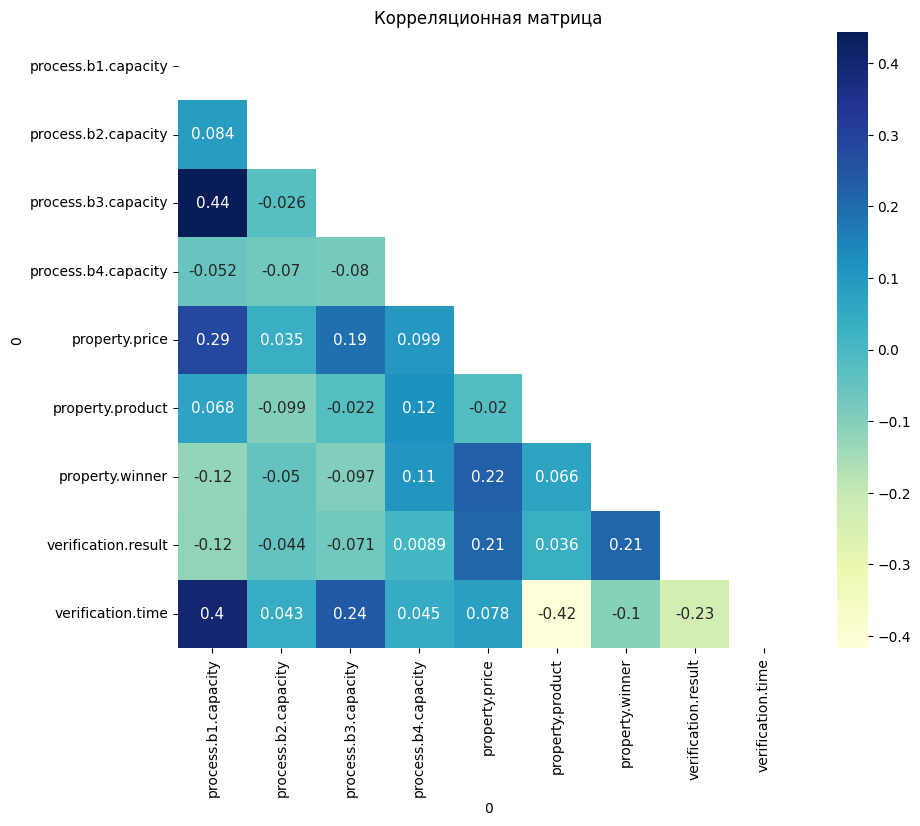

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
mask = np.triu(corr_matrix)

sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
#plt.xticks(rotation=45)
plt.title('Корреляционная матрица')
plt.show()


In [ ]:
#Корреляция между verification.time и verification.result составляет -0.23, что говорит о слабой отрицательной корреляции.
#т.е. при увеличении времени верификации (verification.time) вероятность успешной верификации (verification.result = 1) может снижаться,
#но связь достаточно слабая. Далее проверим на других графиков, можно ли использовать данную зависимость при построении моделей.

#видим среднюю корреляция между process.b1.capacity и verification.time (0.40), что может говорить о том,
#что чем выше мощность первого участника в процессе, тем больше времени может занимать верификация.
#видим отрицательную корреляцию между property.product и verification.time (-0.42), т.е. для разных продуктах время верификации меняется,
#и некоторые продукты требуют меньше времени для верификации.
#Умеренная положительная корреляция между property.winner и property.price (0.22), может быть есть  связь между победителем и ценой товара,
#но эта зависимость все же достаточно слабая.
#видим, что у нас также  корредяция признаков:  b1 и  b3 -44%, но она меньше 70%, поэтому отбрасывать один из них не будем,
#т.к. все процессы важны при моделировании

In [ ]:
from scipy.stats import f_oneway

# Разделим данные на группы по verification.result
group_0 = data[data['verification.result'] == 0]['verification.time']
group_1 = data[data['verification.result'] == 1]['verification.time']

# выполним ANOVA
f_stat, p_val = f_oneway(group_0, group_1)
print(f'F-statistic: {f_stat}, p-value: {p_val}')


F-statistic: 116.19902987449606, p-value: 2.1750683316437007e-26


In [ ]:
#F-статистика: говорит о том, что есть значительная разница между группами по времени верификации (verification.time) в зависимости от исхода верификации
#(verification.result).
#p-value: Очень маленькое значение p говорит о том,  что время верификации отличается для успешных и неуспешных исходов.
#Поэтому связь между этими двумя признаками все-таки есть. ДЛя моделей оставим один таргет, лучше verification.result, потому что это
#главный признак, описывающий успех.


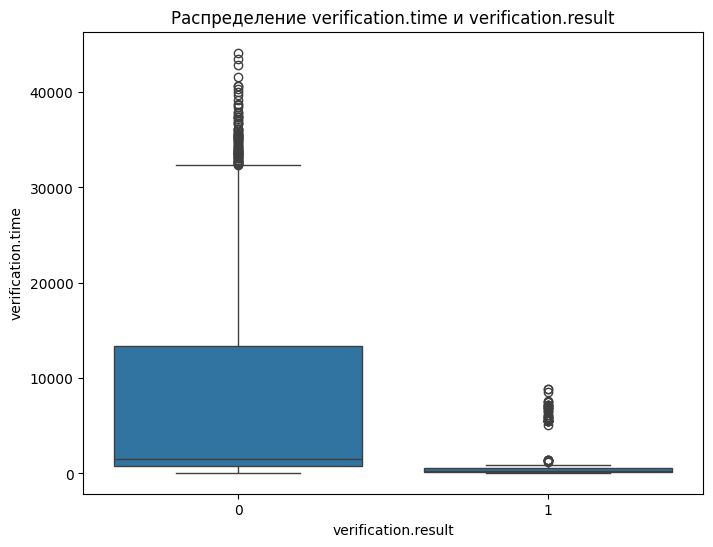

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='verification.result', y='verification.time', data=data)
plt.title('Распределение verification.time и verification.result')
plt.show()


In [ ]:
#видим интересную завсимость, что  когда верификация успешна, минимальное время тратится на верификацию

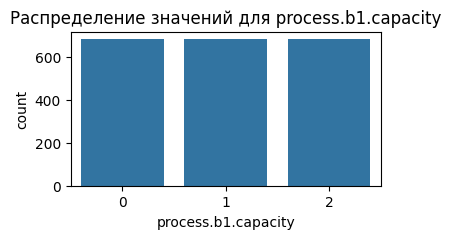

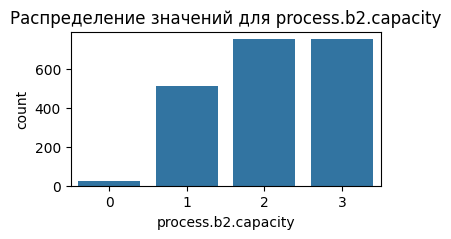

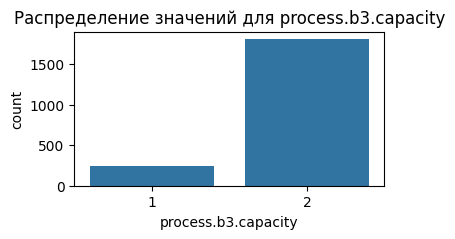

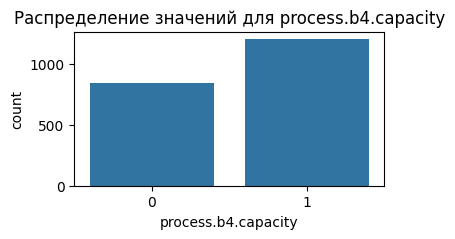

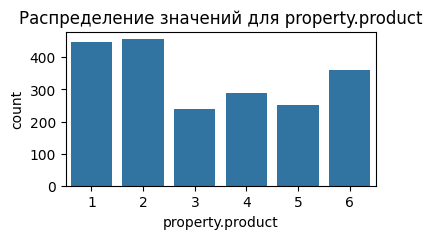

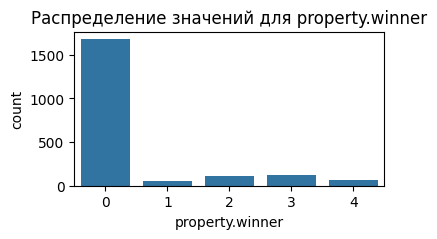

In [ ]:
# построим столбчатые диаграммы для категориальных признаков
for column in ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
               'process.b4.capacity', 'property.product', 'property.winner']:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=column, data=data)
    plt.title(f'Распределение значений для {column}')
    plt.show()


In [ ]:
#видим, что b1 распределен равномерно, для b2 сбалансировано, за исключением значение "0" - практически не представлено,
#для b3 не сбалансировано, значение "1" в несколько раз меньше, чем "2", для b4 сбалансировано, для property_produkt в основном сбалансировано, значения
#"1" и "2" представлены большинством; property_winner, значения "!", "2" , "3" и "4" равномерно распределены, но каждого из них них в несколько раз меньше,
#чем "0".

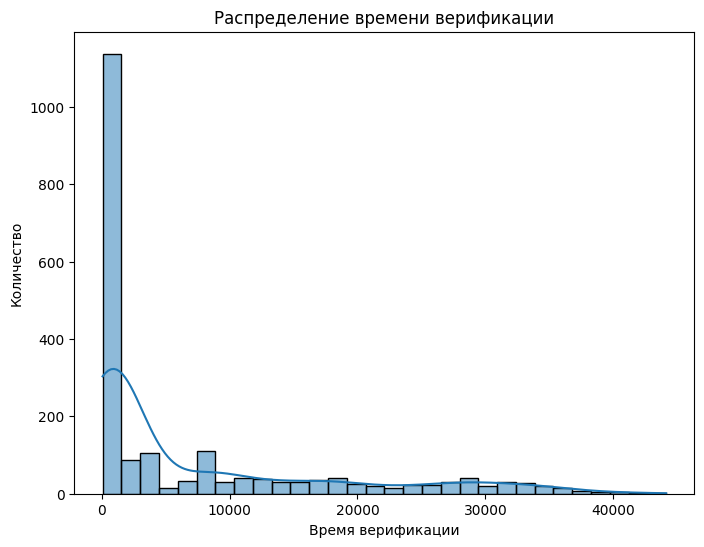

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['verification.time'], bins=30, kde=True)
plt.title('Распределение времени верификации')
plt.xlabel('Время верификации')
plt.ylabel('Количество')
plt.show()


In [ ]:
#мы видим, что в основном верификация проходит быстро, для 1150 образцов в среднем за 140 сек, однако для остальных 900 мы видим
#сильную вариабельность по времени вплоть до 4300 с, посмортим еще график boxplot

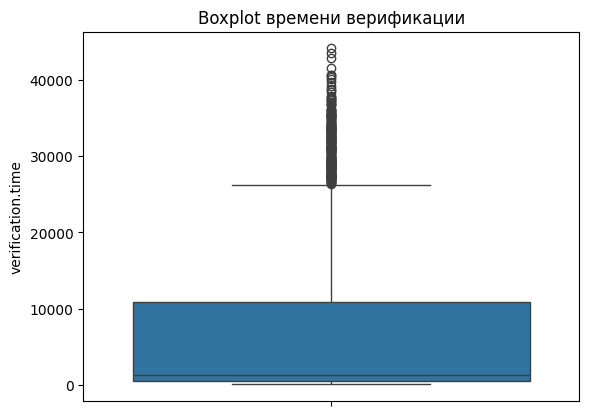

In [ ]:
sns.boxplot(data=data['verification.time'])
plt.title('Boxplot времени верификации')
plt.show()

In [ ]:
#видим, что 50% значений находятся в пределах от 10 до 1000 с медианой приблизительно 50 с,
#остальные 50% находтся в  пределах от 1100 до 2800,  также имеется значительная часть выбросов в диапазоне от 2800 до 4000

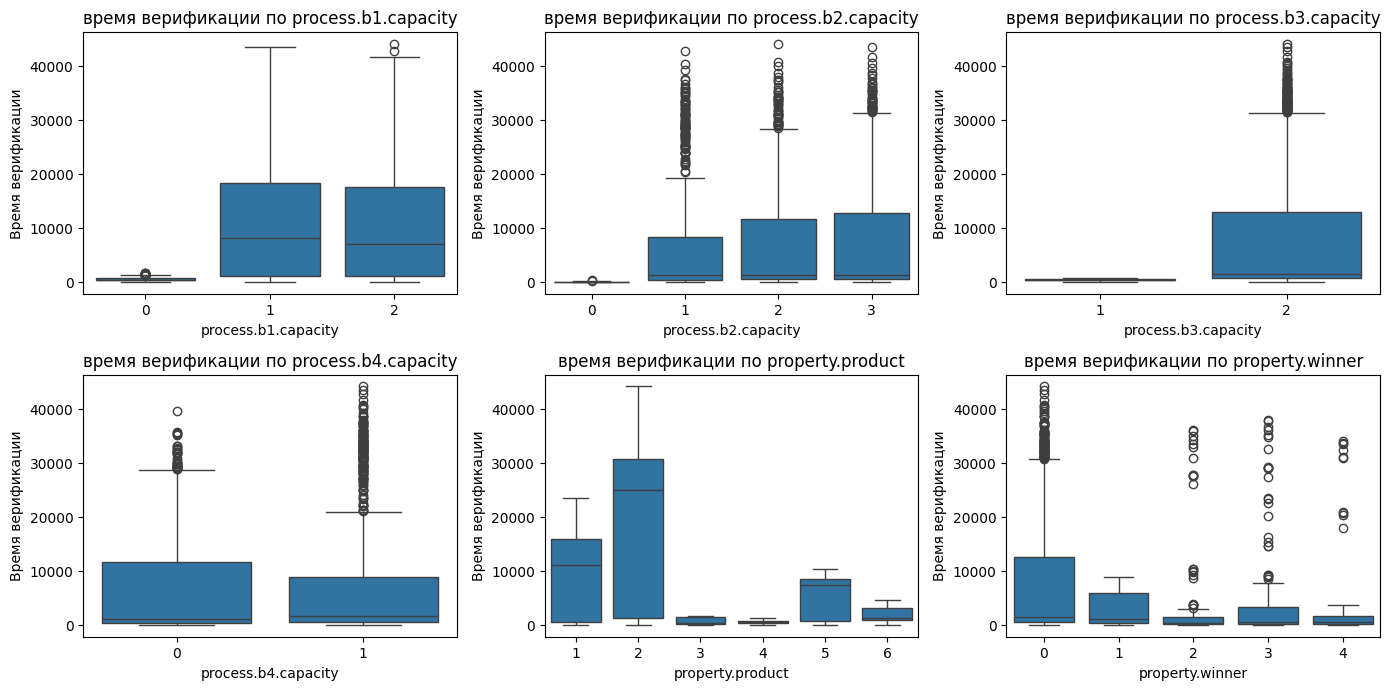

In [ ]:
# Прранализируем призаки отновительно времени верификации
columns = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
           'property.product', 'property.winner']

plt.figure(figsize=(14, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x=col, y='verification.time')
    plt.title(f'время верификации по {col}')
    plt.xlabel(col)
    plt.ylabel('Время верификации')
plt.tight_layout()
plt.show()


In [ ]:
#для 4 процессов видим зависимость мошности процесса от времени верификации, чем  больше мощность, тем больше требуется времени,
#только для 4 процесса видим почти одинаковое распределение времени верификации.
#хорошо видна на графике зависимость продукта от времени, видим, что для продуктов 3,4,6 требуется минимальное время для верификации.
#для победителей, видим что медиана практически для всех расположена одинаково, но когда не было победителей 50% принимает большое разброс значений
#вплоть превышая 40000 с.


In [ ]:
#посмотрим зависимости относительно второго таргета, result.verification

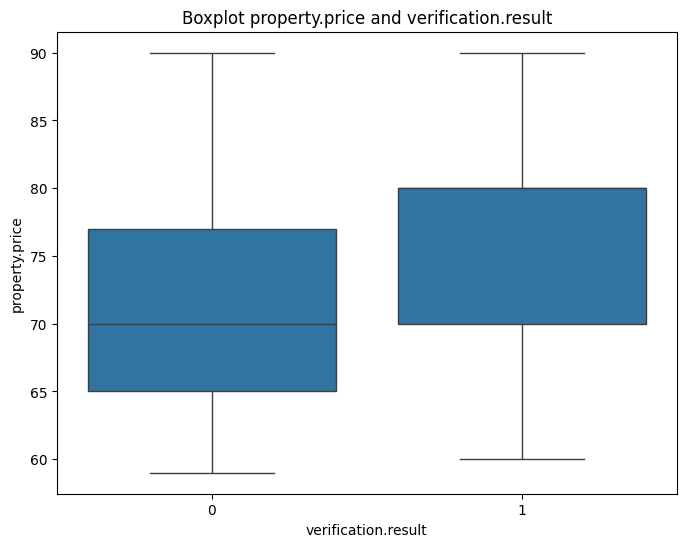

In [ ]:
# Boxplot для property.price и verification.result
plt.figure(figsize=(8, 6))
sns.boxplot(x='verification.result', y='property.price', data=data)
plt.title('Boxplot property.price and verification.result')
plt.show()


In [ ]:
# при успешной верификации, стоимость выше
#чем при отсутствии верификации, 50% находятся в пределах от 70 до 80, когда варификация не произошла стоимость находилась в пределах от 65 до 77

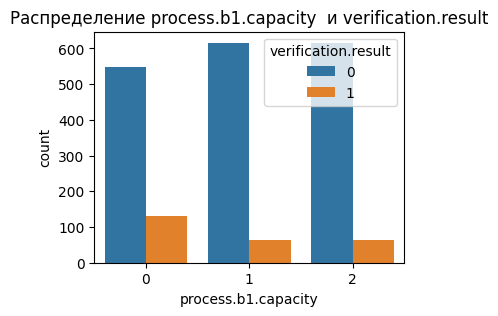

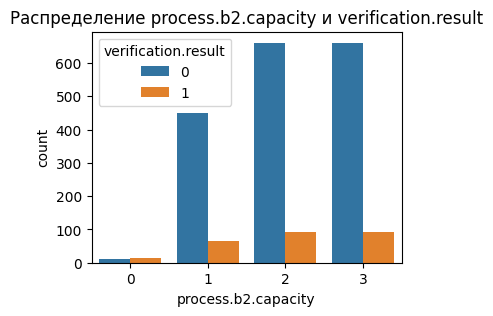

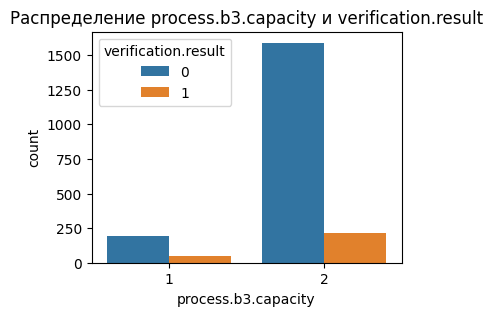

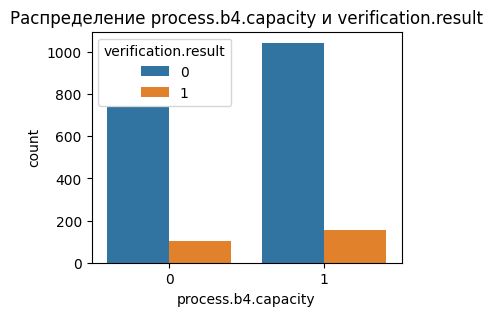

In [ ]:
# посмотрим как verification.result связан с процессами
plt.figure(figsize=(4, 3))
sns.countplot(x='process.b1.capacity', hue='verification.result', data=data)
plt.title('Распределение process.b1.capacity  и verification.result')
plt.show()

plt.figure(figsize=(4, 3))
sns.countplot(x='process.b2.capacity', hue='verification.result', data=data)
plt.title('Распределение process.b2.capacity и verification.result')
plt.show()

plt.figure(figsize=(4, 3))
sns.countplot(x='process.b3.capacity', hue='verification.result', data=data)
plt.title('Распределение process.b3.capacity и verification.result')
plt.show()

plt.figure(figsize=(4, 3))
sns.countplot(x='process.b4.capacity', hue='verification.result', data=data)
plt.title('Распределение process.b4.capacity и verification.result')
plt.show()




In [ ]:
#видим, что для всех процессов картина практически одинакова, для всех мощнстей больше всего случаев неудачной верификации.

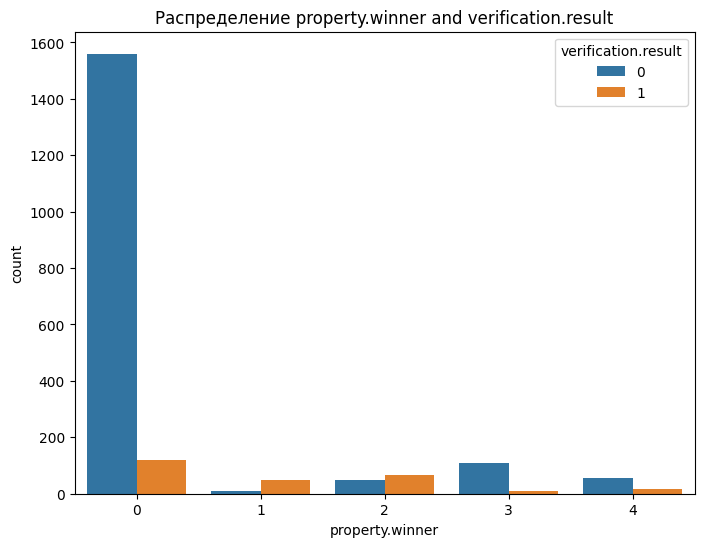

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='property.winner', hue='verification.result', data=data)
plt.title('Распределение property.winner and verification.result')
plt.show()

In [ ]:
#на этом графике из-за распределения для "нулевого" (отсутствует победитель) победителя, масштабы остальных сильно уменьшены,
#посмотрим без включения нулевого победителя
#из этого графика видим, что около 120 результатов, которые были успешно верифицированы, однако нет победителей. скорее всего это могло произойти из-за
#сложной процедуры организации аукциона, длительного времени верификации, определение стоимости и т.п. а также  почти 1600 не успешных верификаций
#интересно изучить, что влияет на успешную верификацию

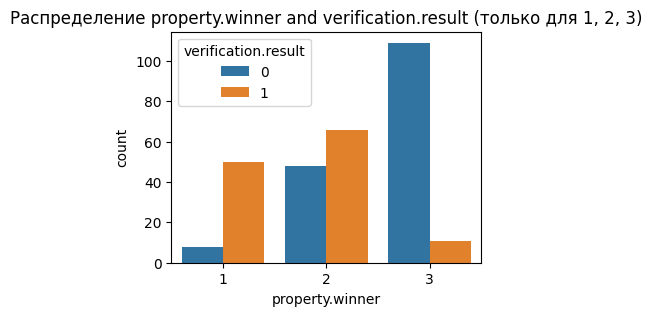

In [ ]:
# Отфильтруем данные,  property.winner принимает значения 1, 2, 3
filtered_data = data[data['property.winner'].isin([1, 2, 3])]


plt.figure(figsize=(4, 3))
sns.countplot(x='property.winner', hue='verification.result', data=filtered_data)
plt.title('Распределение property.winner and verification.result (только для 1, 2, 3)')
plt.show()


In [ ]:
#теперь мы видим, что у победителя "1" и "2" большее количество успешной верификаций, для победителя "3" очень малая доля успешных верификаций.


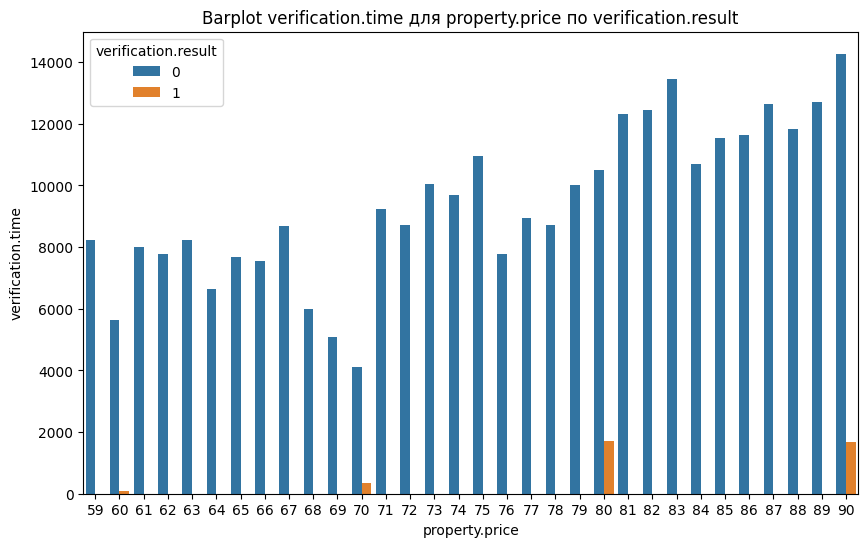

In [ ]:
# Группировка данных по property.price и verification.result с расчетом среднего verification.time
grouped_data = data.groupby(['property.price', 'verification.result'], as_index=False).agg({'verification.time': 'mean'})

plt.figure(figsize=(10, 6))
sns.barplot(x='property.price', y='verification.time', hue='verification.result', data=grouped_data, ci='sd')
plt.title('Barplot verification.time для property.price по verification.result')
plt.show()


In [ ]:
# на этом графике мы видим интересную закономерность, успешная верификая была только для продуктов стоимостью 60,70,80,90
#интересная и пока непонятно с чем связана эта особенность, т.е. стоимость кратны "10"
#также прослеживается тенденция: чем больше стоимость, тем больше нужно времени на верификацию.

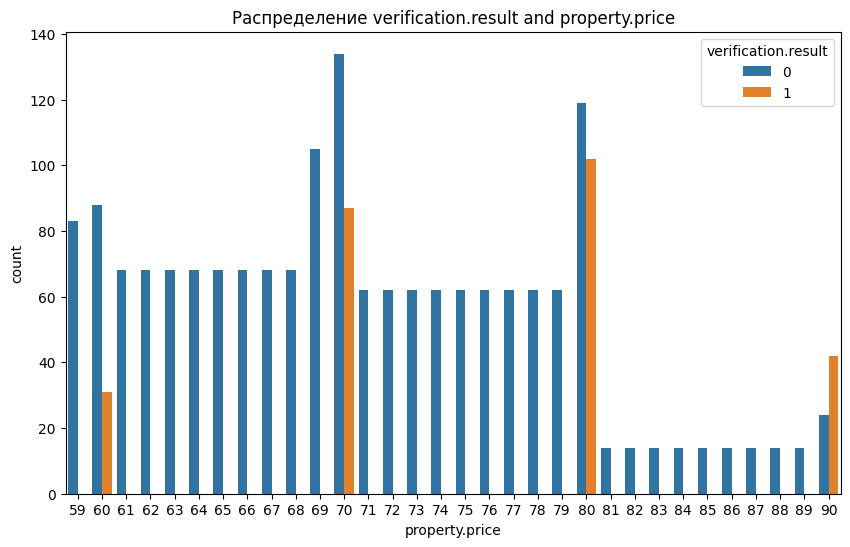

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='property.price', hue='verification.result', data=data)
plt.title('Распределение verification.result and property.price')
plt.show()


In [ ]:
# еще раз убедились в полученных результатах, а также видим, что у нас большинство продууктов стоимостью до 80 (валюта)

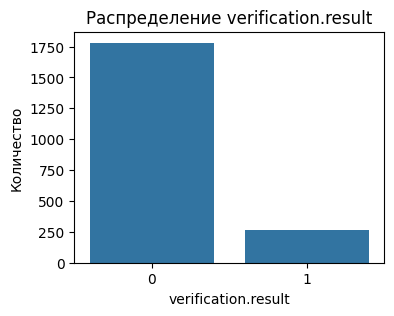

In [ ]:
plt.figure(figsize=(4, 3))

sns.countplot(x='verification.result', data=data)

plt.title('Распределение verification.result')
plt.xlabel('verification.result')
plt.ylabel('Количество')

plt.show()


In [ ]:
# таким образом, процессы которые были успешно верифицированы,  всего 250. класс таргета сильно несбалансированы

In [ ]:
#Пострроим сначала модель Решающее дерево, что б проанализировать улучшится ли наша модель после применения методов бэггинга, бустинга,
#стэкинга

In [ ]:
#  Выбирем признаки и таргет
X = data[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
          'property.price',  'property.product', 'property.winner' ]]
y = data['verification.result']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели дерева решений
tree_model = DecisionTreeClassifier(random_state=42)

# Обучение модели
tree_model.fit(X_train, y_train)

# Предсказание
y_pred = tree_model.predict(X_test)

# Оценка модели
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9951100244498777
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       354
           1       1.00      0.96      0.98        55

    accuracy                           1.00       409
   macro avg       1.00      0.98      0.99       409
weighted avg       1.00      1.00      1.00       409



In [ ]:
# видим, что дерево решений дает отличные  результаты, немного хуже Recall у класса "1", это естественно, так как у нас присутствует
#дисбаланс классов. Нам сейчас инетресно оценить ансамблевые методы, на сколько они могут улучшить результаты, поэтому сейчас заниматься улучшением
#балансировки классов не будем.


In [ ]:
# подберем лучшие гиперпараметры для этой модели

In [ ]:
import joblib
# Зададим  сетку гиперпараметров для поиска
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


# Поиск оптимальных гиперпараметров
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Оценка результатов на тестовой выборке
best_tree_model = grid_search.best_estimator_
y_test_pred = best_tree_model.predict(X_test)

# Сохраним модель для дальнейшего использования в бэггинге
joblib.dump(best_tree_model, 'best_decision_tree_model.pkl')

# Вывод лучших параметров
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

print(f'Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy на тестовой выборке: 0.9951100244498777
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       354
           1       1.00      0.96      0.98        55

    accuracy                           1.00       409
   macro avg       1.00      0.98      0.99       409
weighted avg       1.00      1.00      1.00       409



In [ ]:
# видим совсем небольшие улучшения для предсказания. Применим метод Бэггинга

In [ ]:
from sklearn.ensemble import BaggingClassifier


#  загрузим настроенную модель
best_tree_model = joblib.load('best_decision_tree_model.pkl')


# настроим бэггинг
bagging_model = BaggingClassifier(estimator=best_tree_model,
                                  n_estimators=10,  # Количество моделей в бэггинге
                                  random_state=42,
                                  n_jobs=-1)

# Обучение модели бэггинга
bagging_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_bagging_pred = bagging_model.predict(X_test)

# Оценка модели бэггинга
print(f'Accuracy на тестовой выборке: {accuracy_score(y_test, y_bagging_pred)}')
print(classification_report(y_test, y_bagging_pred))

# Сохранение модели бэггинга
joblib.dump(bagging_model, 'bagging_model_with_best_tree.pkl')

# Загрузка модели
loaded_bagging_model = joblib.load('bagging_model_with_best_tree.pkl')

# Предсказание
y_new_bagging_pred = loaded_bagging_model.predict(X_test)


Accuracy на тестовой выборке: 0.9975550122249389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      0.98      0.99        55

    accuracy                           1.00       409
   macro avg       1.00      0.99      0.99       409
weighted avg       1.00      1.00      1.00       409



In [ ]:
#Видим, что после применения Бэггинга у нас улучшились предсказания для  Recall у обоих классов

In [ ]:
#применим ансамблевый метод бустинга, используем CatBoost, потому что он хорошо себя показывает с категориальными признаками

In [ ]:
from catboost import CatBoostClassifier, Pool


# Подготовка данных
X = data[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
          'property.price',  'property.product', 'property.winner' ]]
y = data['verification.result']

# Обозначим категориальные признаки
categorical_features = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
            'property.product', 'property.winner']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Подготовка данных для CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Модель CatBoost
catboost_model = CatBoostClassifier(iterations=1000,
                                    depth=6,
                                    learning_rate=0.1,
                                    loss_function='Logloss',
                                    verbose=100,
                                    random_seed=42)

# Обучение модели
catboost_model.fit(train_pool)

# Предсказание
y_pred = catboost_model.predict(X_test)

# Оценка модели
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))



0:	learn: 0.6153305	total: 164ms	remaining: 2m 43s
100:	learn: 0.0321392	total: 2.85s	remaining: 25.4s
200:	learn: 0.0130525	total: 5.73s	remaining: 22.8s
300:	learn: 0.0069831	total: 8.47s	remaining: 19.7s
400:	learn: 0.0046512	total: 11.4s	remaining: 17s
500:	learn: 0.0033977	total: 14.6s	remaining: 14.6s
600:	learn: 0.0026195	total: 17.7s	remaining: 11.8s
700:	learn: 0.0022269	total: 20.6s	remaining: 8.78s
800:	learn: 0.0019544	total: 23.4s	remaining: 5.82s
900:	learn: 0.0018509	total: 26.2s	remaining: 2.88s
999:	learn: 0.0017076	total: 28.9s	remaining: 0us
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       534
           1       1.00      1.00      1.00        79

    accuracy                           1.00       613
   macro avg       1.00      1.00      1.00       613
weighted avg       1.00      1.00      1.00       613



In [ ]:
# Модель показала идеальные результаты

In [ ]:
from sklearn.ensemble import StackingClassifier

# Базовые модели с настройкой гиперпараметров
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),  # дерево решений
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Случайный лес
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='minkowski'))  # KNN
]

# Метамодель
meta_model = LogisticRegression()

# Модель стекинга
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

# Подготовка данных
X = data[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
          'property.price',  'property.product', 'property.winner' ]]
y = data['verification.result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели стекинга
stacking_model.fit(X_train, y_train)

# Предсказание
y_pred = stacking_model.predict(X_test)

# Оценка модели
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9967373572593801
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       534
           1       0.99      0.99      0.99        79

    accuracy                           1.00       613
   macro avg       0.99      0.99      0.99       613
weighted avg       1.00      1.00      1.00       613



In [ ]:
#результаты немного хуже, чем для ансамбля бустинга, но все же одни из самых лучших.

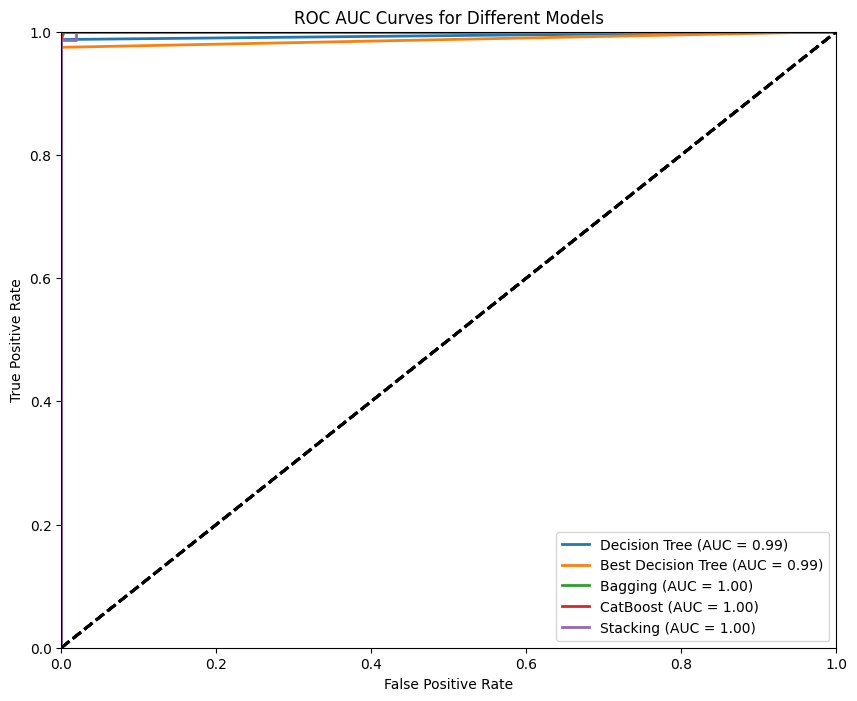

ROC AUC - Decision Tree: 0.99
ROC AUC - Best Decision Tree: 0.99
ROC AUC - Bagging: 1.00
ROC AUC - CatBoost: 1.00
ROC AUC - Stacking: 1.00


In [ ]:
#  Построим ROC AUC для всех моделей

# Функция для построения ROC кривой
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Инициализация графика
plt.figure(figsize=(10, 8))

# Модель дерева решений
y_probs_tree = tree_model.predict_proba(X_test)[:, 1]  # Предсказание вероятностей для класса 1
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree)
auc_tree = roc_auc_score(y_test, y_probs_tree)
plot_roc_curve(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')

# Модель дерева с улучшенными параметрами
y_probs_best_tree = best_tree_model.predict_proba(X_test)[:, 1]  # Предсказание вероятностей
fpr_best_tree, tpr_best_tree, _ = roc_curve(y_test, y_probs_best_tree)
auc_best_tree = roc_auc_score(y_test, y_probs_best_tree)
plot_roc_curve(fpr_best_tree, tpr_best_tree, label=f'Best Decision Tree (AUC = {auc_best_tree:.2f})')

# Модель бэггинга
y_probs_bagging = bagging_model.predict_proba(X_test)[:, 1]
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_probs_bagging)
auc_bagging = roc_auc_score(y_test, y_probs_bagging)
plot_roc_curve(fpr_bagging, tpr_bagging, label=f'Bagging (AUC = {auc_bagging:.2f})')

# Модель бустинга (CatBoost)
y_probs_catboost = catboost_model.predict_proba(X_test)[:, 1]
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_probs_catboost)
auc_catboost = roc_auc_score(y_test, y_probs_catboost)
plot_roc_curve(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {auc_catboost:.2f})')

# Модель стекинга
y_probs_stacking = stacking_model.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_probs_stacking)
auc_stacking = roc_auc_score(y_test, y_probs_stacking)
plot_roc_curve(fpr_stacking, tpr_stacking, label=f'Stacking (AUC = {auc_stacking:.2f})')

# график
plt.legend(loc='lower right')
plt.title('ROC AUC Curves for Different Models')
plt.show()

# Оценка ROC AUC для всех моделей
print(f'ROC AUC - Decision Tree: {auc_tree:.2f}')
print(f'ROC AUC - Best Decision Tree: {auc_best_tree:.2f}')
print(f'ROC AUC - Bagging: {auc_bagging:.2f}')
print(f'ROC AUC - CatBoost: {auc_catboost:.2f}')
print(f'ROC AUC - Stacking: {auc_stacking:.2f}')


In [ ]:
# все ансамбли отлично справились с задачей предсказания верифицации (успешная или нет)

In [ ]:
# интересно посмотреть на работу этих ансамблей для прогнозирования победителя. в описании данных дана информация об образцах:
#Каждый экземпляр представляет собой один проверочный запуск. Проверка проверяет, возможна ли конкретная цена для конкретного продукта,
#и (только для некоторых экземпляров) может ли конкретный участник торгов выиграть продукт по этой цене.
#для этого в качестве таргета выберем  property.winner
# столбец property.winner сильно несбалансирован по этому призаку, преобладает класс "0" (отсутствует победитель)
#попробуем поработать с ансамблями для этой задачи

In [ ]:
#  Выбирем признаки и таргет
X = data[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
          'property.price',  'property.product', 'verification.time', 'verification.result' ]]
y = data['property.winner']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели дерева решений
tree_model_winner = DecisionTreeClassifier(random_state=42)

# Обучение модели
tree_model_winner.fit(X_train, y_train)

# Предсказание
tree_winner = tree_model_winner.predict(X_test)

# Оценка модели
print(f'Accuracy: {accuracy_score(y_test, tree_winner)}')
print(classification_report(y_test, tree_winner))

Accuracy: 0.8801955990220048
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       337
           1       0.43      0.50      0.46        12
           2       0.56      0.56      0.56        27
           3       0.53      0.36      0.43        25
           4       0.60      0.75      0.67         8

    accuracy                           0.88       409
   macro avg       0.61      0.63      0.61       409
weighted avg       0.88      0.88      0.88       409



In [ ]:
#мы видим, что модель решающее дерево хорошо справляется только  с "0", средне с классом "4" классом,
#как мы  предполагали, так как классы несбалансированы

In [ ]:
# настроим бэггинг
bagging_model = BaggingClassifier(estimator=tree_model_winner,
                                  n_estimators=100,  # Количество моделей в бэггинге
                                  random_state=42,
                                  n_jobs=-1)

# Обучение модели бэггинга
bagging_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
bagging_winner = bagging_model.predict(X_test)

# Оценка модели бэггинга
print(f'Accuracy на тестовой выборке: {accuracy_score(y_test, bagging_winner)}')
print(classification_report(y_test, bagging_winner))



Accuracy на тестовой выборке: 0.8801955990220048
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       337
           1       0.45      0.42      0.43        12
           2       0.58      0.56      0.57        27
           3       0.56      0.36      0.44        25
           4       0.46      0.75      0.57         8

    accuracy                           0.88       409
   macro avg       0.60      0.61      0.59       409
weighted avg       0.88      0.88      0.88       409



In [ ]:
#ансамбль Бэггинг не сильно помог улучшить результаты, попробуем Бустинг

In [ ]:
#  Выбирем признаки и таргет
X = data[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
          'property.price',  'property.product', 'verification.time', 'verification.result' ]]
y = data['property.winner']

# Обозначим категориальные признаки
categorical_features = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
            'property.product', 'verification.result']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Подготовка данных
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

catboost_model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=100,
    random_seed=42
)


# Обучение модели
catboost_model.fit(train_pool)

# Предсказание
boost_winner = catboost_model.predict(X_test)

# Оценка модели
print(f'Accuracy: {accuracy_score(y_test, boost_winner)}')
print(classification_report(y_test, boost_winner))


0:	learn: 1.3721309	total: 45.1ms	remaining: 45s
100:	learn: 0.2559111	total: 4.03s	remaining: 35.9s
200:	learn: 0.1738238	total: 8.53s	remaining: 33.9s
300:	learn: 0.1331026	total: 13.1s	remaining: 30.4s
400:	learn: 0.1079136	total: 17.7s	remaining: 26.4s
500:	learn: 0.0894408	total: 22.6s	remaining: 22.5s
600:	learn: 0.0766499	total: 27.3s	remaining: 18.1s
700:	learn: 0.0652602	total: 31.9s	remaining: 13.6s
800:	learn: 0.0559729	total: 36.4s	remaining: 9.04s
900:	learn: 0.0492260	total: 41s	remaining: 4.5s
999:	learn: 0.0433452	total: 45.5s	remaining: 0us
Accuracy: 0.8743882544861338
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       501
           1       0.69      0.47      0.56        19
           2       0.45      0.39      0.42        36
           3       0.59      0.35      0.44        37
           4       0.43      0.45      0.44        20

    accuracy                           0.87       613
   macro avg       0.62    

In [ ]:
# ансамбль Стэкинг

In [ ]:
# Базовые модели с настройкой гиперпараметров
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=50, random_state=42)),  # дерево решений
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Случайный лес
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='minkowski'))  #  KNN
]

# Метамодель
meta_model = LogisticRegression()

# Модель стекинга
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

# Подготовка данных

X = data[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
          'property.price',  'property.product', 'verification.time', 'verification.result' ]]
y = data['property.winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели стекинга
stacking_model.fit(X_train, y_train)

# Предсказание
stacking_winner = stacking_model.predict(X_test)

# Оценка модели
print(f'Accuracy: {accuracy_score(y_test, stacking_winner)}')
print(classification_report(y_test, stacking_winner))


Accuracy: 0.8841761827079935
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       501
           1       0.55      0.32      0.40        19
           2       0.56      0.42      0.48        36
           3       0.68      0.62      0.65        37
           4       0.43      0.45      0.44        20

    accuracy                           0.88       613
   macro avg       0.63      0.56      0.58       613
weighted avg       0.87      0.88      0.88       613



In [ ]:
#построим ROC-AUC кривые

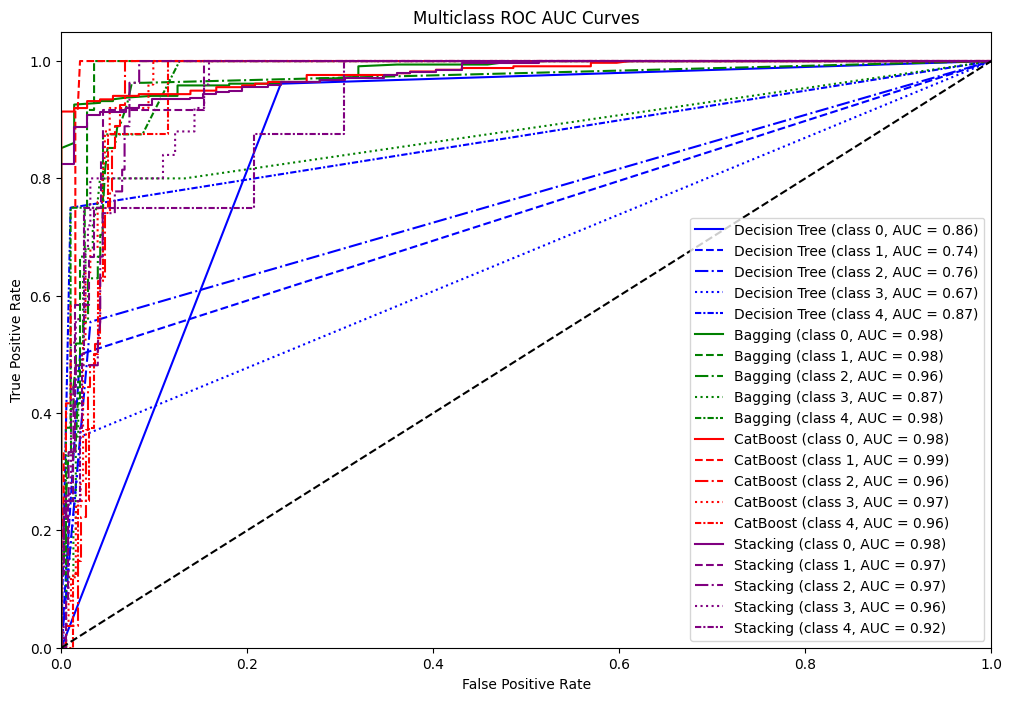

In [ ]:
# One-vs-rest для всех классов
def plot_multiclass_roc(models, model_names, X_test, y_test_bin, n_classes):
    plt.figure(figsize=(12, 8))
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]

    for i, (model, model_name) in enumerate(zip(models, model_names)):
        # Предсказания вероятностей для каждого класса
        y_probs = model.predict_proba(X_test)

        for j in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, j], y_probs[:, j])
            auc = roc_auc_score(y_test_bin[:, j], y_probs[:, j])
            plt.plot(fpr, tpr, color=colors[i], linestyle=linestyles[j],
                     label=f'{model_name} (class {j}, AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC AUC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Список моделей
models  = [tree_model_winner, bagging_model, catboost_model, stacking_model]
model_names = ['Decision Tree', 'Bagging', 'CatBoost', 'Stacking']

# Бинаризация целевой переменной
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Построение ROC AUC кривых
plot_multiclass_roc(models, model_names, X_test, y_test_bin, n_classes=5)

In [ ]:
# для задачи предсказания победителя мы лучше видим, насколько лучше справляются ансамбли, в сравнении с решающим деревом,
#примениние ансамблевых методов дало очень хорошие результаты, даже с учетом несбалансированных признаков

In [ ]:
# поработаем немного с признаками, может это улучшит работу моделей при прогнозировании победителей

In [ ]:
# разделим мощности каждого процесса на время верификации, это будет скорость процесса
data['process1_speed'] = data['process.b1.capacity'] / data['verification.time']
data['process2_speed'] = data['process.b2.capacity'] / data['verification.time']
data['process3_speed'] = data['process.b3.capacity'] / data['verification.time']
data['process4_speed'] = data['process.b4.capacity'] / data['verification.time']

# Заменим значения бесконечности на нули
data.replace([np.inf, -np.inf], 0, inplace=True)

print(data[['process1_speed', 'process2_speed', 'process3_speed', 'process4_speed']].head(20))


0   process1_speed  process2_speed  process3_speed  process4_speed
1              0.0             0.0        0.012246        0.006123
2              0.0             0.0        0.009957        0.004979
3              0.0             0.0        0.012912        0.006456
4              0.0             0.0        0.018409        0.009205
5              0.0             0.0        0.023401        0.011700
6              0.0             0.0        0.024390        0.012195
7              0.0             0.0        0.012966        0.006483
8              0.0             0.0        0.024707        0.012353
9              0.0             0.0        0.025641        0.012821
10             0.0             0.0        0.010152        0.005076
11             0.0             0.0        0.024922        0.012461
12             0.0             0.0        0.025668        0.012834
13             0.0             0.0        0.013822        0.006911
14             0.0             0.0        0.022696        0.01

In [ ]:
# используем наше наблюдение, что успешная верификация происходила, только для цен 60,70,80,90

In [ ]:
# Создадим новый признак  'price_category'
data['price_category'] = np.where(data['property.price'].isin([60, 70, 80, 90]), 'multiple_of_10', 'other')

# Преобразуем категориальный признак в числовой
data['price_category_numeric'] = data['price_category'].map({'multiple_of_10': 1, 'other': 0})

data = data.drop(columns=['price_category'])

print(data[['property.price', 'price_category_numeric']].head())


0  property.price  price_category_numeric
1              59                       0
2              59                       0
3              59                       0
4              59                       0
5              60                       1


In [ ]:
#Проверим на ансамбле Бустинга, потому что он дал лучшие результаты для всех классов

In [ ]:
#  Выбирем признаки и таргет

X = data[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity','verification.result',
          'property.product', 'verification.time', 'process1_speed',
          'process2_speed', 'process3_speed', 'process4_speed','price_category_numeric' ]]
y = data['property.winner']


# Обозначим категориальные признаки
categorical_features = ['price_category_numeric', 'process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity',
            'property.product', 'verification.result']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Подготовка данных
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

catboost_model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',
        verbose=100,
    random_seed=42
)


# Обучение модели
catboost_model.fit(train_pool)

# Предсказание
boost_property = catboost_model.predict(X_test)

# Оценка модели
print(f'Accuracy: {accuracy_score(y_test, boost_property)}')
print(classification_report(y_test, boost_property))


0:	learn: 1.3561334	total: 166ms	remaining: 2m 46s
100:	learn: 0.2762334	total: 6.65s	remaining: 59.2s
200:	learn: 0.2151127	total: 13.7s	remaining: 54.3s
300:	learn: 0.1765939	total: 20.7s	remaining: 48.1s
400:	learn: 0.1484233	total: 27.6s	remaining: 41.2s
500:	learn: 0.1264980	total: 34.5s	remaining: 34.4s
600:	learn: 0.1075818	total: 41.1s	remaining: 27.3s
700:	learn: 0.0935185	total: 47.9s	remaining: 20.4s
800:	learn: 0.0811987	total: 55.2s	remaining: 13.7s
900:	learn: 0.0734556	total: 1m 2s	remaining: 6.85s
999:	learn: 0.0663621	total: 1m 9s	remaining: 0us
Accuracy: 0.8091353996737357
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       501
           1       0.56      0.47      0.51        19
           2       0.36      0.28      0.31        36
           3       0.31      0.30      0.30        37
           4       0.14      0.15      0.15        20

    accuracy                           0.81       613
   macro avg       0.4

In [ ]:
# к сожалению результаты ухудшились:(((, особенно для класса "4"